In [1]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 8.3MB/s 
     |████████████████████████████████| 9.5MB 41.1MB/s 
     |████████████████████████████████| 2.1MB 54.9MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: Cython 0.29.22
    Uninstalling Cython-0.29.22:
      Successfully uninstalled Cython-0.29.22


In [2]:
# check pmdarima
from pmdarima.arima import auto_arima

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import pandas_datareader as web
plt.style.use(style="seaborn")
%matplotlib inline

In [4]:
#Loading the dataset from yahoo
df = web.DataReader('AC.TO', data_source='yahoo', start='2012-01-01', end='2021-02-16') 


#displaying the first 5 rows of the data
df.tail(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-02-09,21.629999,21.200001,21.610001,21.500000,3247400,21.500000
2021-02-10,21.400000,21.000000,21.299999,21.080000,3490800,21.080000
2021-02-11,21.330000,20.809999,21.139999,21.200001,3466400,21.200001
2021-02-12,22.450001,21.379999,21.600000,22.330000,6869000,22.330000
2021-02-16,23.549999,22.480000,23.000000,23.420000,7055200,23.420000


In [5]:
df1 = df[['Close']].copy()

In [6]:
df1.head(5)

,Close
Date,
2012-01-03,1.02
2012-01-04,1.03
2012-01-05,1.07
2012-01-06,1.08
2012-01-09,1.11


In [7]:
df1.describe()

,Close
count,2290.000000
mean,15.868236
std,12.378095
min,0.820000
25%,7.582500
50%,12.565000
75%,23.540001
max,52.090000


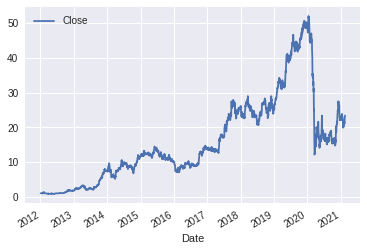

In [8]:
df1.plot()

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [11]:
adfuller_test(df1['Close'])

ADF Test Statistic : -1.7074376049886404
p-value : 0.42728453075545536
#Lags Used : 14
Number of Observations Used : 2275
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [12]:
from statsmodels.graphics.tsaplots import plot_acf

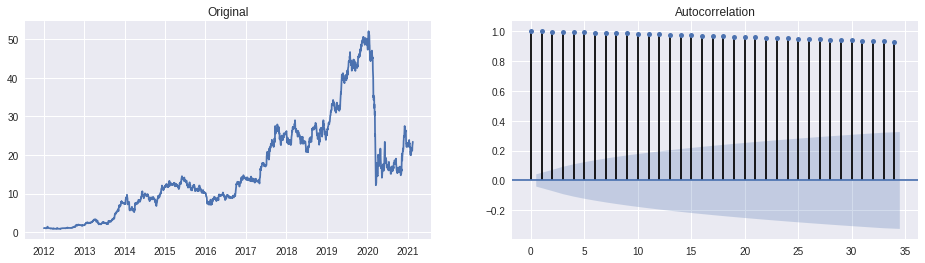

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(df1.Close)
ax1.set_title("Original")
plot_acf(df1.Close, ax=ax2);

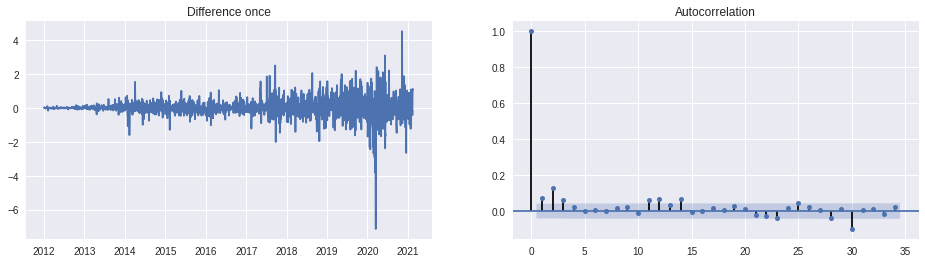

In [14]:
diff = df1.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
plot_acf(diff, ax=ax2);

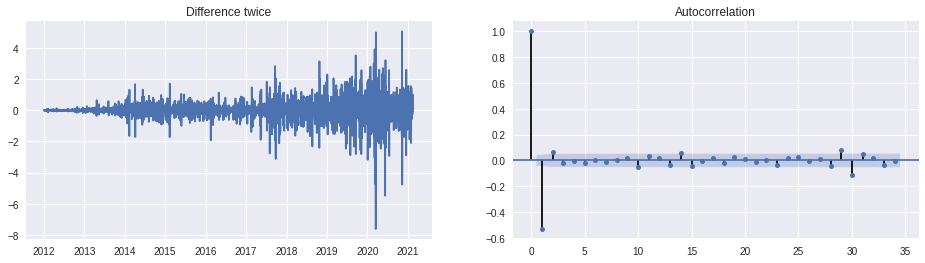

In [15]:
diff = df1.Close.diff().diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference twice")
plot_acf(diff, ax=ax2);

In [16]:
from pmdarima.arima.utils import ndiffs

In [17]:
ndiffs(df.Close, test="adf")

1

In [18]:
from statsmodels.graphics.tsaplots import plot_pacf

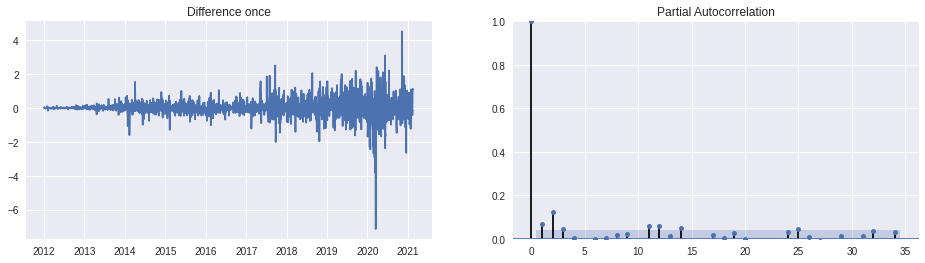

In [19]:
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_pacf(diff, ax=ax2);

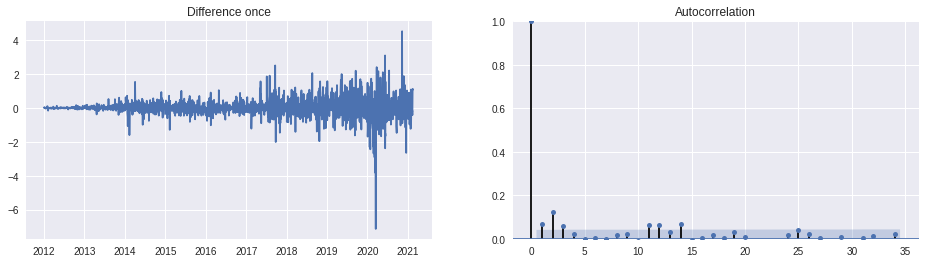

In [20]:
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_acf(diff, ax=ax2);

In [21]:
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [22]:
dt = pd.DataFrame(index=range(0,len(df)),columns=['Date'])
dt=[]
for i in range(0,len(df)):
    dt.append(df.index[i])


In [23]:
df2 = df['Close'].values
size = int(len(df2) * 0.85)
train, test = df2[0:size], df2[size:len(df2)]

In [24]:
dt_test=dt[size:len(df2)]

In [25]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
  dt_prt = dt_test[t]
  model = ARIMA(history, order=(0,1,0))
  model = model.fit(disp=0)
  #output = model.predict()
  output = model.forecast()
  yhat = output[0]
  yhaaat = output
  predictions.append(yhat)
  obs = test[t]
  history.append(obs)
  print('predicted=%f, expected=%f' % (yhat, obs) +'     '+ str(dt_prt))
  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


predicted=42.561348, expected=43.099998     2019-10-03 00:00:00
predicted=43.121622, expected=43.270000     2019-10-04 00:00:00
predicted=43.291701, expected=43.240002     2019-10-07 00:00:00
predicted=43.261675, expected=42.880001     2019-10-08 00:00:00
predicted=42.901479, expected=43.660000     2019-10-09 00:00:00
predicted=43.681867, expected=44.810001     2019-10-10 00:00:00
predicted=44.832446, expected=45.549999     2019-10-11 00:00:00
predicted=45.572812, expected=45.630001     2019-10-15 00:00:00
predicted=45.652843, expected=45.380001     2019-10-16 00:00:00
predicted=45.402703, expected=45.540001     2019-10-17 00:00:00
predicted=45.562773, expected=45.259998     2019-10-18 00:00:00
predicted=45.282616, expected=46.230000     2019-10-21 00:00:00
predicted=46.253101, expected=45.430000     2019-10-22 00:00:00
predicted=45.452682, expected=45.730000     2019-10-23 00:00:00
predicted=45.752822, expected=46.009998     2019-10-24 00:00:00
predicted=46.032952, expected=45.990002 

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=34.956553, expected=35.070000     2020-03-04 00:00:00
predicted=35.086609, expected=32.160000     2020-03-05 00:00:00
predicted=32.175183, expected=33.160000     2020-03-06 00:00:00
predicted=33.175663, expected=30.309999     2020-03-09 00:00:00
predicted=30.324266, expected=31.219999     2020-03-10 00:00:00
predicted=31.234702, expected=27.400000     2020-03-11 00:00:00
predicted=27.412837, expected=24.900000     2020-03-12 00:00:00
predicted=24.911614, expected=25.370001     2020-03-13 00:00:00
predicted=25.381838, expected=18.230000     2020-03-16 00:00:00
predicted=18.238362, expected=16.090000     2020-03-17 00:00:00
predicted=16.097319, expected=12.900000     2020-03-18 00:00:00
predicted=12.905767, expected=12.150000     2020-03-19 00:00:00
predicted=12.155400, expected=12.410000     2020-03-20 00:00:00
predicted=12.415524, expected=12.700000     2020-03-23 00:00:00
predicted=12.705661, expected=15.110000     2020-03-24 00:00:00
predicted=15.116826, expected=17.510000 

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=18.248255, expected=18.799999     2020-04-27 00:00:00
predicted=18.808519, expected=20.600000     2020-04-28 00:00:00
predicted=20.609378, expected=21.650000     2020-04-29 00:00:00
predicted=21.659875, expected=20.240000     2020-04-30 00:00:00
predicted=20.249196, expected=19.299999     2020-05-01 00:00:00
predicted=19.308741, expected=17.629999     2020-05-04 00:00:00
predicted=17.637939, expected=17.010000     2020-05-05 00:00:00
predicted=17.017640, expected=16.680000     2020-05-06 00:00:00
predicted=16.687479, expected=16.530001     2020-05-07 00:00:00
predicted=16.537404, expected=17.049999     2020-05-08 00:00:00
predicted=17.057647, expected=16.299999     2020-05-11 00:00:00
predicted=16.307286, expected=15.320000     2020-05-12 00:00:00
predicted=15.326816, expected=14.100000     2020-05-13 00:00:00
predicted=14.106232, expected=15.220000     2020-05-14 00:00:00
predicted=15.226762, expected=14.620000     2020-05-15 00:00:00
predicted=14.626473, expected=16.730000 

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=21.019443, expected=19.510000     2020-06-10 00:00:00
predicted=19.518730, expected=17.850000     2020-06-11 00:00:00
predicted=17.857943, expected=19.400000     2020-06-12 00:00:00
predicted=19.408669, expected=18.540001     2020-06-15 00:00:00
predicted=18.548261, expected=19.230000     2020-06-16 00:00:00
predicted=19.238581, expected=18.750000     2020-06-17 00:00:00
predicted=18.758351, expected=18.809999     2020-06-18 00:00:00
predicted=18.818375, expected=18.400000     2020-06-19 00:00:00
predicted=18.408178, expected=18.540001     2020-06-22 00:00:00
predicted=18.548242, expected=18.000000     2020-06-23 00:00:00
predicted=18.007983, expected=17.190001     2020-06-24 00:00:00
predicted=17.197599, expected=17.100000     2020-06-25 00:00:00
predicted=17.107553, expected=16.700001     2020-06-26 00:00:00
predicted=16.707362, expected=17.480000     2020-06-29 00:00:00
predicted=17.487724, expected=16.950001     2020-06-30 00:00:00
predicted=16.957473, expected=17.129999 

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=16.477189, expected=16.330000     2020-07-27 00:00:00
predicted=16.337121, expected=16.730000     2020-07-28 00:00:00
predicted=16.737303, expected=16.360001     2020-07-29 00:00:00
predicted=16.367129, expected=16.090000     2020-07-30 00:00:00
predicted=16.097000, expected=15.110000     2020-07-31 00:00:00
predicted=15.116541, expected=15.120000     2020-08-04 00:00:00
predicted=15.126543, expected=15.720000     2020-08-05 00:00:00
predicted=15.726818, expected=15.950000     2020-08-06 00:00:00
predicted=15.956921, expected=15.730000     2020-08-07 00:00:00
predicted=15.736816, expected=16.230000     2020-08-10 00:00:00
predicted=16.237044, expected=16.690001     2020-08-11 00:00:00
predicted=16.697255, expected=16.950001     2020-08-12 00:00:00
predicted=16.957372, expected=17.080000     2020-08-13 00:00:00
predicted=17.087428, expected=16.850000     2020-08-14 00:00:00
predicted=16.857319, expected=16.180000     2020-08-17 00:00:00
predicted=16.187006, expected=15.870000 

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=18.978214, expected=19.049999     2020-09-17 00:00:00
predicted=19.058247, expected=17.980000     2020-09-18 00:00:00
predicted=17.987754, expected=16.510000     2020-09-21 00:00:00
predicted=16.517080, expected=16.500000     2020-09-22 00:00:00
predicted=16.507072, expected=16.010000     2020-09-23 00:00:00
predicted=16.016845, expected=16.040001     2020-09-24 00:00:00
predicted=16.046856, expected=15.800000     2020-09-25 00:00:00
predicted=15.806743, expected=15.870000     2020-09-28 00:00:00
predicted=15.876771, expected=15.280000     2020-09-29 00:00:00
predicted=15.286499, expected=15.690000     2020-09-30 00:00:00
predicted=15.696683, expected=15.950000     2020-10-01 00:00:00
predicted=15.956799, expected=15.640000     2020-10-02 00:00:00
predicted=15.646655, expected=15.500000     2020-10-05 00:00:00
predicted=15.506588, expected=15.520000     2020-10-06 00:00:00
predicted=15.526594, expected=16.100000     2020-10-07 00:00:00
predicted=16.106855, expected=16.760000 

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=22.879690, expected=22.980000     2020-12-29 00:00:00
predicted=22.989734, expected=23.170000     2020-12-30 00:00:00
predicted=23.179814, expected=22.770000     2020-12-31 00:00:00
predicted=22.779633, expected=22.110001     2021-01-04 00:00:00
predicted=22.119337, expected=23.010000     2021-01-05 00:00:00
predicted=23.019730, expected=22.719999     2021-01-06 00:00:00
predicted=22.729597, expected=23.200001     2021-01-07 00:00:00
predicted=23.209806, expected=22.840000     2021-01-08 00:00:00
predicted=22.849642, expected=22.389999     2021-01-11 00:00:00
predicted=22.399438, expected=23.129999     2021-01-12 00:00:00
predicted=23.139761, expected=22.990000     2021-01-13 00:00:00
predicted=22.999695, expected=23.889999     2021-01-14 00:00:00
predicted=23.900088, expected=22.920000     2021-01-15 00:00:00
predicted=22.929656, expected=22.969999     2021-01-18 00:00:00
predicted=22.979673, expected=23.049999     2021-01-19 00:00:00
predicted=23.059704, expected=22.889999 

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [26]:
prediction_dataframe = pd.DataFrame(columns=['Date', 'ActualValue', 'PredictiedValue'])


In [27]:
prediction_dataframe['Date'] = dt_test
prediction_dataframe['ActualValue'] = obs
prediction_dataframe['PredictiedValue'] = predictions
prediction_dataframe.tail(10)

,Date,ActualValue,PredictiedValue
334,2021-02-02,23.42,[20.42851257458332]
335,2021-02-03,23.42,[21.278882035294966]
336,2021-02-04,23.42,[21.819113889215078]
337,2021-02-05,23.42,[21.78909796280104]
338,2021-02-08,23.42,[21.87913355971448]
339,2021-02-09,23.42,[21.65903201043608]
340,2021-02-10,23.42,[21.50896280088362]
341,2021-02-11,23.42,[21.088775076786387]
342,2021-02-12,23.42,[21.20882454990142]
343,2021-02-16,23.42,[22.33931373319991]


In [28]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(test,predictions))

1.0139466183962038

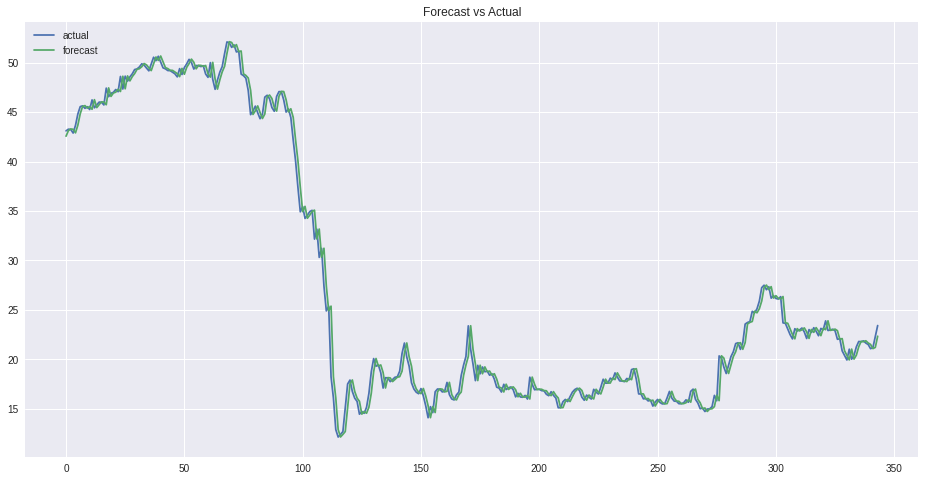

In [29]:
plt.figure(figsize=(16, 8))
plt.plot(test, label="actual")
plt.plot(predictions, label="forecast")
plt.title("Forecast vs Actual")
plt.legend(loc="upper left")

In [30]:
model2=ARIMA(df['Close'],order=(0,1,0))
model2=model2.fit()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

In [31]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

In [32]:
us_holidays = CustomBusinessDay(calendar = USFederalHolidayCalendar())

In [33]:
index_future_dates=pd.date_range(start='02/16/2021', periods=31, freq=us_holidays)
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2021-02-16    23.429786
2021-02-17    23.439572
2021-02-18    23.449358
2021-02-19    23.459144
2021-02-22    23.468930
2021-02-23    23.478716
2021-02-24    23.488502
2021-02-25    23.498288
2021-02-26    23.508073
2021-03-01    23.517859
2021-03-02    23.527645
2021-03-03    23.537431
2021-03-04    23.547217
2021-03-05    23.557003
2021-03-08    23.566789
2021-03-09    23.576575
2021-03-10    23.586361
2021-03-11    23.596147
2021-03-12    23.605933
2021-03-15    23.615719
2021-03-16    23.625505
2021-03-17    23.635291
2021-03-18    23.645076
2021-03-19    23.654862
2021-03-22    23.664648
2021-03-23    23.674434
2021-03-24    23.684220
2021-03-25    23.694006
2021-03-26    23.703792
2021-03-29    23.713578
2021-03-30    23.723364
Freq: C, Name: ARIMA Predictions, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


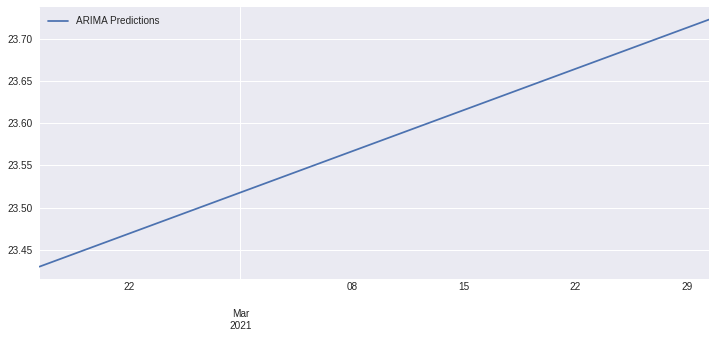

In [34]:
pred.plot(figsize=(12,5),legend=True)

In [35]:
import pickle

#
# Create your model here (same as above)
#

# Save to file in the current working directory
pkl_filename = "ARIMA_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

In [36]:
model_autoARIMA = auto_arima(train, start_p=0, start_q=0,
test='adf',       # use adftest to find optimal 'd'
max_p=9, max_q=9, # maximum p and q
m=1,              # frequency of series
d=1,           # let model determine 'd'
seasonal=False,   # No Seasonality
start_P=0, 
D=0, 
trace=True,
error_action='ignore',  
suppress_warnings=True, 
stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1655.530, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1657.238, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1657.235, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1659.995, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1659.228, Time=0.89 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.595 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1946
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -825.765
Date:                Fri, 16 Apr 2021   AIC                           1655.530
Time:                        23:35:00   BIC                           1666.676
Sample:                             0   HQIC                          1659.628
                               - 1946                                       